In [1]:
#pip install geopandas

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
#import rdata
import pandas as pd

I first load the row data

In [3]:
network_data = pd.read_csv("data/flandreau_jobst_internationalcurrencies_data_2.txt", sep='\t') #, skiprows=5)
network_data['tot_trade'] = network_data.groupby('country_A')['bitrade'].transform('sum')
network_data['tot_trade_enM']= network_data['tot_trade']/10**6

In [4]:
network_data

,country_A,country_B,quote1890,quote1900,quote1910,colony,dist,bitrade,gold,debtburden,...,gold_B,debtburden_B,rlong_B,rshort1900_B,rshort1890_B,rgdp_B,rgdpcap_B,poldemo_B,tot_trade,tot_trade_enM
0,ARG,AUH,0,0,0,0,9.374816,5909.76,1,6.844985,...,1,5.222065,4.01,4.58,4.48,18.14368,7.39388,0.87,1390598.537,1.390599
1,ARG,AUS,0,0,0,0,9.360207,1258.74,1,6.844985,...,1,6.065920,3.12,5.50,7.00,16.52440,8.29729,6.37,1390598.537,1.390599
2,ARG,BEL,1,1,1,0,9.330780,127361.20,1,6.844985,...,1,4.882136,3.15,4.09,3.18,17.02921,8.22443,10.66,1390598.537,1.390599
3,ARG,BRA,0,1,1,0,7.613854,65335.41,1,6.844985,...,0,5.516892,6.97,9.20,6.30,16.31639,6.51915,0.22,1390598.537,1.390599
4,ARG,CAN,0,0,0,0,9.105001,5073.84,1,6.844985,...,1,6.784091,3.61,6.50,6.50,16.58091,7.97625,8.58,1390598.537,1.390599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,VEN,SGP,0,0,0,0,9.816373,0.00,0,3.939394,...,0,0.000000,NaN,7.38,7.50,13.31327,6.96414,0.00,117008.901,0.117009
1976,VEN,SIA,0,0,0,0,9.738914,0.00,0,3.939394,...,0,0.000000,NaN,NaN,NaN,15.59293,6.69456,0.00,117008.901,0.117009
1977,VEN,SWE,0,0,0,0,9.072714,0.00,0,3.939394,...,1,1.766284,3.54,5.87,4.48,16.38848,7.84815,0.31,117008.901,0.117009
1978,VEN,URY,0,0,0,0,8.549546,0.00,0,3.939394,...,1,8.207317,7.70,8.00,8.00,14.52374,7.70481,0.06,117008.901,0.117009


In [5]:
print(network_data.keys())

Index(['country_A', 'country_B', 'quote1890', 'quote1900', 'quote1910',
       'colony', 'dist', 'bitrade', 'gold', 'debtburden', 'rlong',
       'rshort1900', 'rshort1890', 'rgdp', 'rgdpcap', 'poldemo', 'coverage',
       'gold_B', 'debtburden_B', 'rlong_B', 'rshort1900_B', 'rshort1890_B',
       'rgdp_B', 'rgdpcap_B', 'poldemo_B', 'tot_trade', 'tot_trade_enM'],
      dtype='object')


Now, I try to format the data as we are used in the different tutorials.
I isloate the nodes and their relevant characteristics as such.
I isolate the edges with their own directional characteristics/ non-directional.
Then, I create a network illustrating currecy quotations links for the year 1890.

In [6]:
node_data = network_data[['country_A', 'gold', 'debtburden', 'rlong',
       'rshort1890', 'rgdp', 'rgdpcap', 'poldemo', 'tot_trade_enM']].drop_duplicates()
node_data

,country_A,gold,debtburden,rlong,rshort1890,rgdp,rgdpcap,poldemo,tot_trade_enM
0,ARG,1,6.844985,7.01,9.33,16.37536,7.92154,0.30,1.390599
44,AUH,1,5.222065,4.01,4.48,18.14368,7.39388,0.87,3.162253
88,AUS,1,6.065920,3.12,7.00,16.52440,8.29729,6.37,1.860737
132,BEL,1,4.882136,3.15,3.18,17.02921,8.22443,10.66,4.046946
176,BRA,0,5.516892,6.97,6.30,16.31639,6.51915,0.22,1.341469
220,CAN,1,6.784091,3.61,6.50,16.58091,7.97625,8.58,1.494323
264,CEY,1,1.362319,3.25,NaN,15.43420,7.16240,0.00,0.344479
308,CHE,1,0.910000,3.08,3.89,16.35308,8.25140,5.60,1.789957
352,CHL,0,2.939891,5.60,8.10,15.57273,7.57507,1.78,0.545445
396,CHN,0,4.340557,6.10,7.00,19.20001,6.30079,0.00,1.630523


To get more intuitive data visualization, I download a gis background world map and fit network positions accordingly

<Axes: >

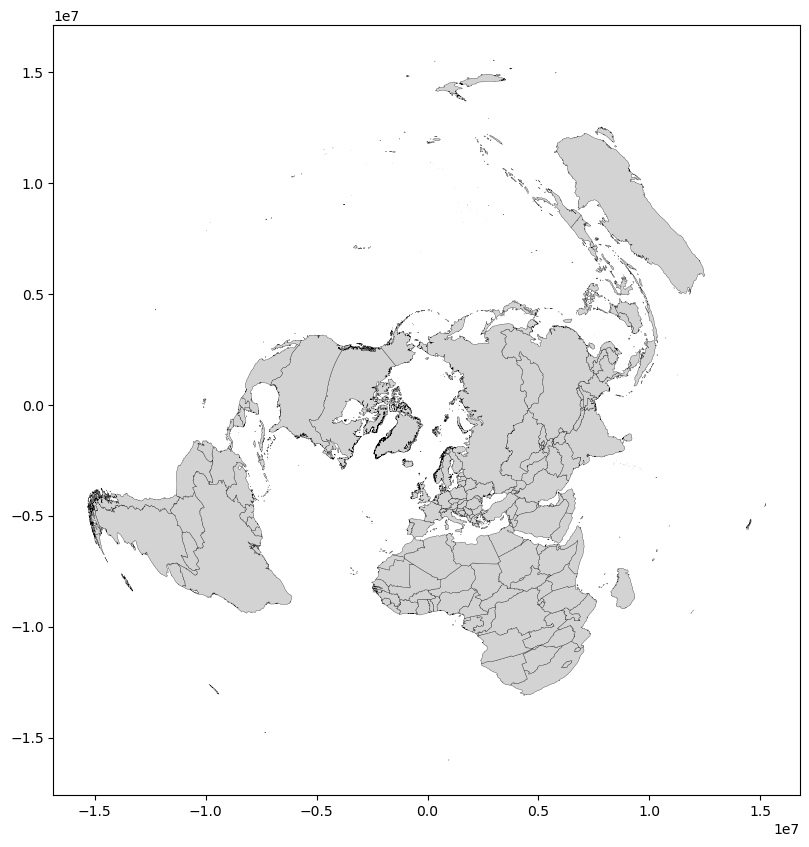

In [7]:
import geopandas as gpd

# Provide the file path to your shapefile
shapefile_path = 'data/world-administrative-boundaries.shp'

# Read the shapefile using GeoPandas
gdf = gpd.read_file(shapefile_path)

#I convert it to another coodrinate system
#to plot the network it will be better to have north azimutal projection than mercator

#EPSG:102016
# Define the new CRS you want to change to
new_crs = 'ESRI:102016'

# Change the CRS of the geometry column
gdf = gdf.to_crs(new_crs)

# Plot the background map
fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the width and height as needed
gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.2)

In [8]:
#download world population and merge them as well

population = pd.read_csv("data/population.csv")
# Filter data for the year 1960
population = population[population['Year'] == 1960]
node_data_geo = pd.merge(node_data, population[['Country Code', 'Value']], left_on='country_A', right_on='Country Code')


#add the geometry
node_data_geo = pd.merge(gdf[['iso3', 'name', 'geometry']], node_data_geo, left_on='iso3', right_on='country_A')
node_data_geo['geometry'] = node_data_geo['geometry'].centroid
node_data_geo['pop_enM'] = node_data_geo['Value']/10**6
node_data_geo = node_data_geo.sort_values(by='country_A')
print(node_data_geo.shape)
node_data_geo


(37, 15)


,iso3,name,geometry,country_A,gold,debtburden,rlong,rshort1890,rgdp,rgdpcap,poldemo,tot_trade_enM,Country Code,Value,pop_enM
25,ARG,Argentina,POINT (-12675895.208 -5792177.789),ARG,1,6.844985,7.01,9.33,16.37536,7.92154,0.30,1.390599,ARG,20349744,20.349744
6,AUS,Australia,POINT (9009105.060 8912365.340),AUS,1,6.065920,3.12,7.00,16.52440,8.29729,6.37,1.860737,AUS,10276477,10.276477
36,BEL,Belgium,POINT (357584.299 -4375030.731),BEL,1,4.882136,3.15,3.18,17.02921,8.22443,10.66,4.046946,BEL,9153489,9.153489
32,BRA,Brazil,POINT (-8863475.331 -6755257.718),BRA,0,5.516892,6.97,6.30,16.31639,6.51915,0.22,1.341469,BRA,73092515,73.092515
4,CAN,Canada,POINT (-3254337.313 349336.515),CAN,1,6.784091,3.61,6.50,16.58091,7.97625,8.58,1.494323,CAN,17909356,17.909356
1,CHE,Switzerland,POINT (689575.430 -4766763.783),CHE,1,0.910000,3.08,3.89,16.35308,8.25140,5.60,1.789957,CHE,5327827,5.327827
26,CHL,Chile,POINT (-13562616.181 -4521374.411),CHL,0,2.939891,5.60,8.10,15.57273,7.57507,1.78,0.545445,CHL,8141820,8.141820
23,CHN,China,POINT (5731641.846 1369616.897),CHN,0,4.340557,6.10,7.00,19.20001,6.30079,0.00,1.630523,CHN,667070000,667.070000
13,COL,Colombia,POINT (-9157877.733 -2794040.793),COL,0,0.186170,10.30,9.50,15.17393,6.88038,0.00,0.089260,COL,15687688,15.687688
22,CUB,Cuba,POINT (-7462973.165 -1453979.451),CUB,0,0.000000,NaN,NaN,13.98145,6.56808,0.00,0.498697,CUB,7267395,7.267395


In [9]:
network_data

,country_A,country_B,quote1890,quote1900,quote1910,colony,dist,bitrade,gold,debtburden,...,gold_B,debtburden_B,rlong_B,rshort1900_B,rshort1890_B,rgdp_B,rgdpcap_B,poldemo_B,tot_trade,tot_trade_enM
0,ARG,AUH,0,0,0,0,9.374816,5909.76,1,6.844985,...,1,5.222065,4.01,4.58,4.48,18.14368,7.39388,0.87,1390598.537,1.390599
1,ARG,AUS,0,0,0,0,9.360207,1258.74,1,6.844985,...,1,6.065920,3.12,5.50,7.00,16.52440,8.29729,6.37,1390598.537,1.390599
2,ARG,BEL,1,1,1,0,9.330780,127361.20,1,6.844985,...,1,4.882136,3.15,4.09,3.18,17.02921,8.22443,10.66,1390598.537,1.390599
3,ARG,BRA,0,1,1,0,7.613854,65335.41,1,6.844985,...,0,5.516892,6.97,9.20,6.30,16.31639,6.51915,0.22,1390598.537,1.390599
4,ARG,CAN,0,0,0,0,9.105001,5073.84,1,6.844985,...,1,6.784091,3.61,6.50,6.50,16.58091,7.97625,8.58,1390598.537,1.390599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,VEN,SGP,0,0,0,0,9.816373,0.00,0,3.939394,...,0,0.000000,NaN,7.38,7.50,13.31327,6.96414,0.00,117008.901,0.117009
1976,VEN,SIA,0,0,0,0,9.738914,0.00,0,3.939394,...,0,0.000000,NaN,NaN,NaN,15.59293,6.69456,0.00,117008.901,0.117009
1977,VEN,SWE,0,0,0,0,9.072714,0.00,0,3.939394,...,1,1.766284,3.54,5.87,4.48,16.38848,7.84815,0.31,117008.901,0.117009
1978,VEN,URY,0,0,0,0,8.549546,0.00,0,3.939394,...,1,8.207317,7.70,8.00,8.00,14.52374,7.70481,0.06,117008.901,0.117009


In [10]:
Currency_network = nx.from_pandas_edgelist(network_data[['quote1890','quote1900', 'quote1910','colony','dist','bitrade', 'country_A', 'country_B']], 'country_A', 'country_B', create_using=nx.DiGraph(), edge_attr=True)
# Add nodes to the graph with their positions based on GeoPandas geometry
for index, row in node_data_geo.iterrows():
    Currency_network.add_node(row.iso3, pos=(row.geometry.x, row.geometry.y), size=row.pop_enM, size_eco=row.tot_trade_enM, label_attribute= row.country_A)  
print(Currency_network)

DiGraph with 45 nodes and 1980 edges


In [11]:
# Draw the network with node positions
pos = nx.get_node_attributes(Currency_network, 'pos')

node_to_remove = []

for key in node_data['country_A']:
    if key not in pos:
        node_to_remove.append(key)
        
Currency_network.remove_nodes_from(node_to_remove)
print(Currency_network)

DiGraph with 36 nodes and 1260 edges


<Figure size 10000x10000 with 0 Axes>

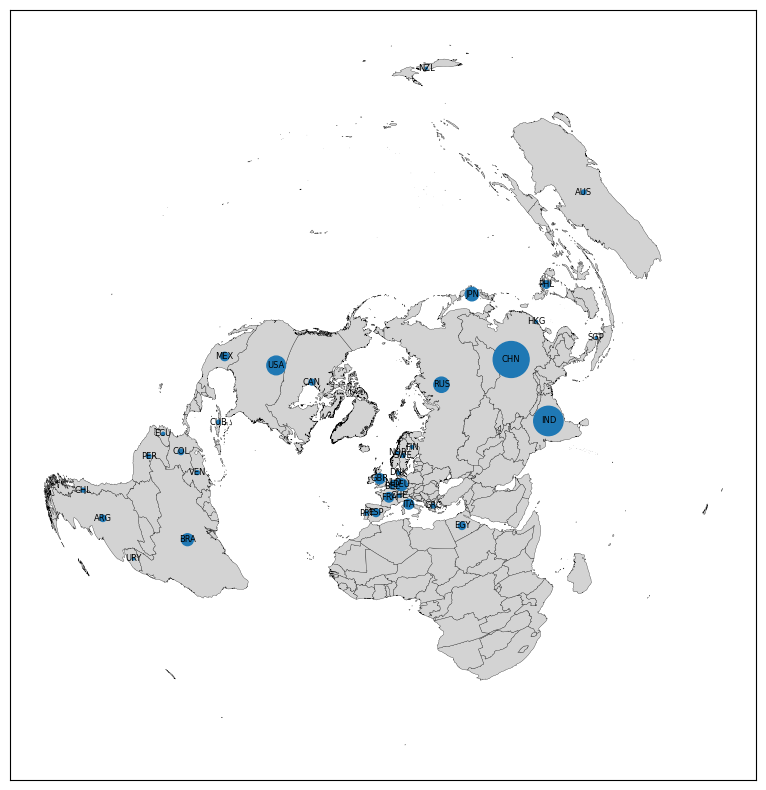

In [12]:
# Define the figure size
plt.figure(figsize=(100, 100))


# Plot the background map

fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the width and height as needed
gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.2)

pop_enM_values = [Currency_network.nodes[node]['size'] 
                  for node in Currency_network.nodes]
scaled_pop_enM_values = [0.1 * value for value in pop_enM_values]

nx.draw_networkx_nodes(Currency_network, pos, 
    node_size=pop_enM_values)


# Define parameters for labels
labels = nx.get_node_attributes(Currency_network, 'label_attribute')  # Replace 'label_attribute' with the actual attribute name containing labels
label_pos = {k: (pos[k][0], pos[k][1]) for k in Currency_network.nodes()}  # Adjust the y-coordinate for label positions

# Draw labels with customized parameters
nx.draw_networkx_labels(Currency_network, pos=label_pos, labels=labels, font_size=6)


plt.show()



In [13]:
# List all the attributes of edges
edge_attributes = set()  # Use a set to avoid duplicate attributes

for u, v, attrs in Currency_network.edges(data=True):
    edge_attributes.update(attrs.keys())

print("Attributes of edges:")
for attr in edge_attributes:
    print(attr)

Attributes of edges:
colony
bitrade
quote1900
quote1910
quote1890
dist


Une première carte qui montre l'évolution du systéme monétaire avec les interconnexions entre monnaies au cours du temps

[]

<Figure size 10000x10000 with 0 Axes>

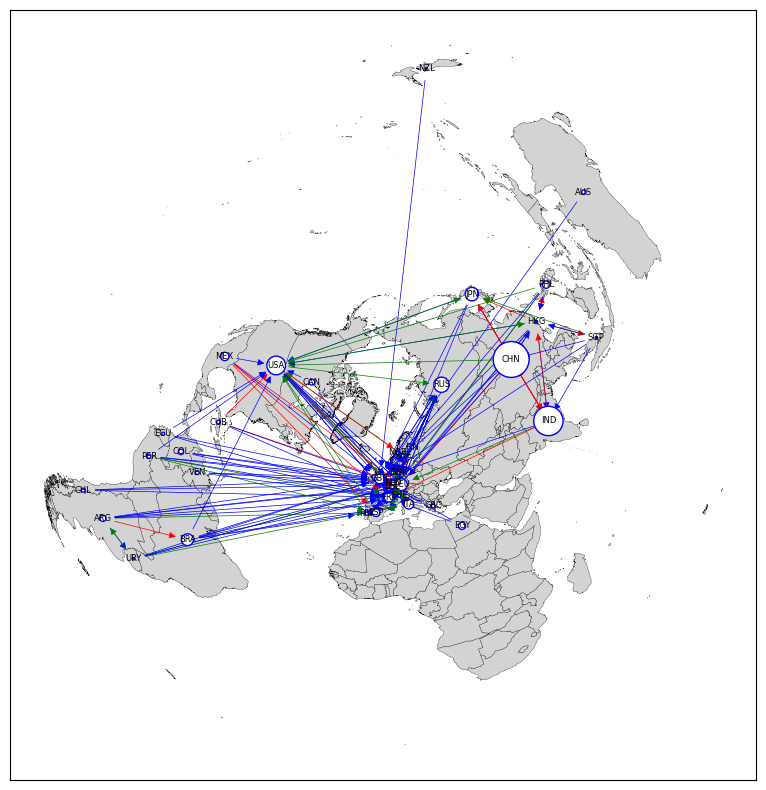

In [14]:
# Define the figure size
plt.figure(figsize=(100, 100))


fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the width and height as needed
gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.2)

pop_enM_values = [Currency_network.nodes[node]['size'] 
                  for node in Currency_network.nodes]
scaled_pop_enM_values = [0.1 * value for value in pop_enM_values]

nx.draw_networkx_nodes(Currency_network, pos, 
    node_size=pop_enM_values,  node_shape='o', node_color='white', edgecolors='blue')


# Define parameters for labels
labels = nx.get_node_attributes(Currency_network, 'label_attribute')  # Replace 'label_attribute' with the actual attribute name containing labels
label_pos = {k: (pos[k][0], pos[k][1]) for k in Currency_network.nodes()}  # Adjust the y-coordinate for label positions

# Draw labels with customized parameters
nx.draw_networkx_labels(Currency_network, pos=label_pos, labels=labels, font_size=6)


for u, v, attrs in Currency_network.edges(data=True):
    if attrs['quote1890'] ==1:  # Adjust the condition as needed
        nx.draw_networkx_edges(Currency_network, pos, edgelist=[(u, v)], edge_color='blue', width=0.5)
    elif attrs['quote1900'] ==1:
        nx.draw_networkx_edges(Currency_network, pos, edgelist=[(u, v)], edge_color='red', width=0.5)
    elif attrs['quote1910'] ==1:
        nx.draw_networkx_edges(Currency_network, pos, edgelist=[(u, v)], edge_color='green', width=0.5)
plt.savefig('results/network_currency_plot.png')  # Save as PNG image
plt.plot()

Une deuxième carte pour visualiser les flux commerciaux à travers la variable bitrade

In [15]:
network_data

,country_A,country_B,quote1890,quote1900,quote1910,colony,dist,bitrade,gold,debtburden,...,gold_B,debtburden_B,rlong_B,rshort1900_B,rshort1890_B,rgdp_B,rgdpcap_B,poldemo_B,tot_trade,tot_trade_enM
0,ARG,AUH,0,0,0,0,9.374816,5909.76,1,6.844985,...,1,5.222065,4.01,4.58,4.48,18.14368,7.39388,0.87,1390598.537,1.390599
1,ARG,AUS,0,0,0,0,9.360207,1258.74,1,6.844985,...,1,6.065920,3.12,5.50,7.00,16.52440,8.29729,6.37,1390598.537,1.390599
2,ARG,BEL,1,1,1,0,9.330780,127361.20,1,6.844985,...,1,4.882136,3.15,4.09,3.18,17.02921,8.22443,10.66,1390598.537,1.390599
3,ARG,BRA,0,1,1,0,7.613854,65335.41,1,6.844985,...,0,5.516892,6.97,9.20,6.30,16.31639,6.51915,0.22,1390598.537,1.390599
4,ARG,CAN,0,0,0,0,9.105001,5073.84,1,6.844985,...,1,6.784091,3.61,6.50,6.50,16.58091,7.97625,8.58,1390598.537,1.390599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,VEN,SGP,0,0,0,0,9.816373,0.00,0,3.939394,...,0,0.000000,NaN,7.38,7.50,13.31327,6.96414,0.00,117008.901,0.117009
1976,VEN,SIA,0,0,0,0,9.738914,0.00,0,3.939394,...,0,0.000000,NaN,NaN,NaN,15.59293,6.69456,0.00,117008.901,0.117009
1977,VEN,SWE,0,0,0,0,9.072714,0.00,0,3.939394,...,1,1.766284,3.54,5.87,4.48,16.38848,7.84815,0.31,117008.901,0.117009
1978,VEN,URY,0,0,0,0,8.549546,0.00,0,3.939394,...,1,8.207317,7.70,8.00,8.00,14.52374,7.70481,0.06,117008.901,0.117009


In [16]:
network_data['bitrade'].describe()

count    1.980000e+03
mean     4.861607e+04
std      1.975023e+05
min      0.000000e+00
25%      0.000000e+00
50%      5.970549e+02
75%      1.633203e+04
max      3.545484e+06
Name: bitrade, dtype: float64

[]

<Figure size 10000x10000 with 0 Axes>

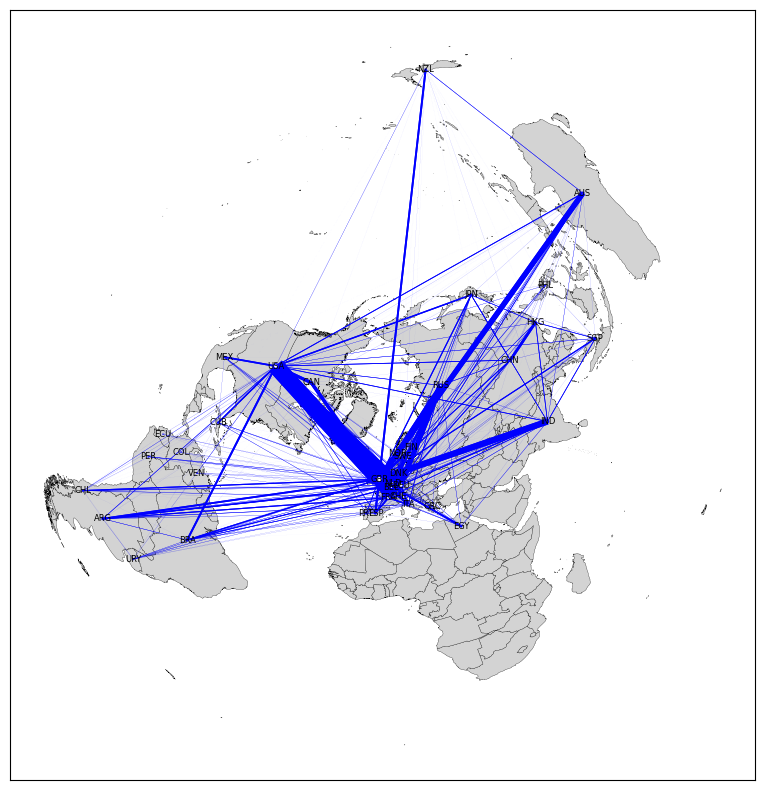

In [17]:
# Define the figure size
plt.figure(figsize=(100, 100))


fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the width and height as needed
gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.2)

trad_tot_enM_values = [Currency_network.nodes[node]['size_eco'] 
                  for node in Currency_network.nodes]
scaled_trad_tot_enM_values = [10 * value for value in pop_enM_values]

nx.draw_networkx_nodes(Currency_network, pos, 
    node_size=trad_tot_enM_values,  node_shape='o', node_color='white', edgecolors='blue')


# Define parameters for labels
labels = nx.get_node_attributes(Currency_network, 'label_attribute')  # Replace 'label_attribute' with the actual attribute name containing labels
label_pos = {k: (pos[k][0], pos[k][1]) for k in Currency_network.nodes()}  # Adjust the y-coordinate for label positions

# Draw labels with customized parameters
nx.draw_networkx_labels(Currency_network, pos=label_pos, labels=labels, font_size=6)


for u, v, attrs in Currency_network.edges(data=True):
        nx.draw_networkx_edges(Currency_network, pos, edgelist=[(u, v)], arrows=False, edge_color='blue', width=attrs['bitrade']/300000)
plt.savefig('results/network_bi_trade.png')  # Save as PNG image
plt.plot()